In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from func.data_main_structure import *

# Data Science Project Architecture
## Getting a feel of an end-to-end data science solution

In this lab, you'll see how all the pieces of data science: data analysis, code, tooling, experiments, come together to create a complete project. You'll perform a smaller-scale demonstration of a data science project lifecycle. Of course, you have to keep in mind that "real-life" data science is highly iterative. You might be working on the same task(s) for weeks or months - this lab is not able to show that.

You'll be working with the asthma dataset located [here](https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset). As always, it's preloaded for you in the `data/` directory. **Your main goal is to predict what factors lead to positive diagnosis.**

This time, I suggest you do your research into separate notebooks, not inside this one. Use one or several, as you see fit; there are no guidelines as to how many notebooks you should have, or how long (or short) they have to be.

### Problem 1. Project structure (1 point)
Create the necessary directories and structure that you'll use to put your work in. I am providing a suggestion, but you don't have to follow it.
`data/` for... data :D
`notebooks/` for your research. Feel free to move this one inside.
`src/` for Python code (which you'll need to create towards the end of the lab)
`test/` (or `tests/`) for unit tests

You may add any other structure you like. For inspiration, you can see how popular libraries handle their file structure.

Create a GitHub repo (or any other Git-based source control, but I **highly** suggest GitHub) containing your initial project structure. Don't forget to commit relatively often so you have a way to track what you've done so far and go back if something goes awry.

#### GitHub Repo: https://github.com/plamensve/Data_Science_Upskill_Softuni.git

##### This repository was created for the entire course, but you can easily find the solution for the current homework

### Problem 2. Data Exploration (1 point)
In an appropriate notebook, load the data. Ensure its validity and start your EDA. Feel free to create any visualizations, tables, filters, etc. you see fit.

In [3]:
data = pd.read_csv('../data/asthma_disease_data.csv')
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


##### Checking the main structure of the dataset

In [4]:
data_len = len(data)
data_shape = data.shape

##### Separated the patients into groups

In [5]:
#We need PatientID and Age to separate the patients
patient_grouped_by_id_and_age = data[['PatientID', 'Age']].copy()
patient_grouped_by_id_and_age

,PatientID,Age
0,5034,63
1,5035,26
2,5036,57
3,5037,40
4,5038,61
...,...,...
2387,7421,43
2388,7422,18
2389,7423,54
2390,7424,46


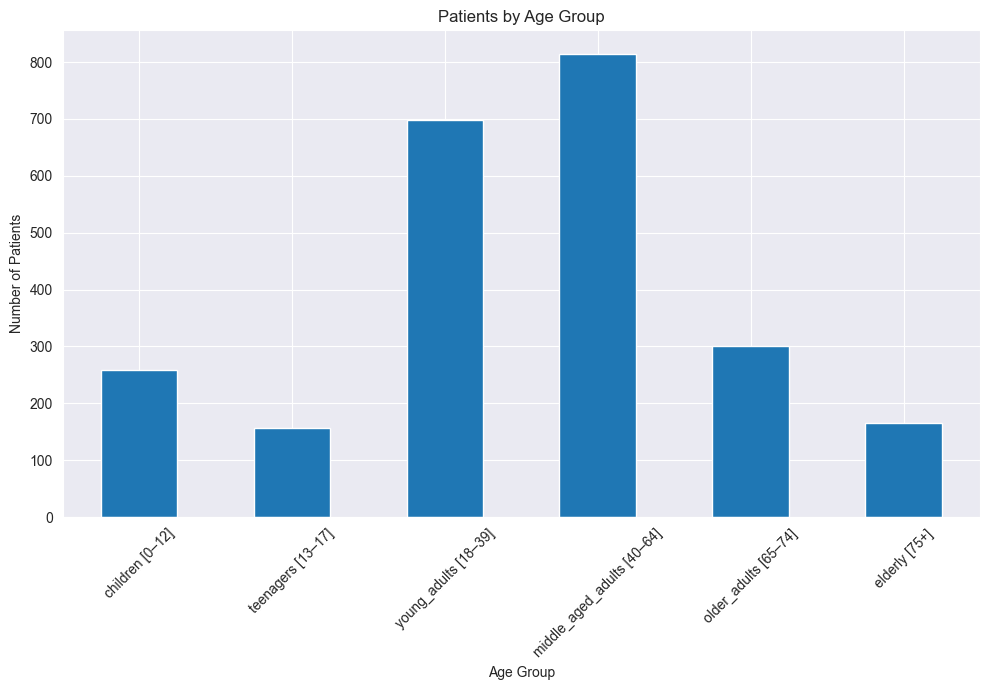

In [6]:
bins = [0, 12, 17, 39, 64, 74, float('inf')]
labels = ['children [0–12]', 'teenagers [13–17]', 'young_adults [18–39]', 'middle_aged_adults [40–64]', 'older_adults [65–74]', 'elderly [75+]']

patient_grouped_by_id_and_age['age_group'] = pd.cut(patient_grouped_by_id_and_age['Age'], bins=bins, labels=labels)
age_group_counts = patient_grouped_by_id_and_age['age_group'].value_counts().sort_index()

plt.figure(figsize=(10, 7))
age_group_counts.plot(kind='bar')

plt.title('Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

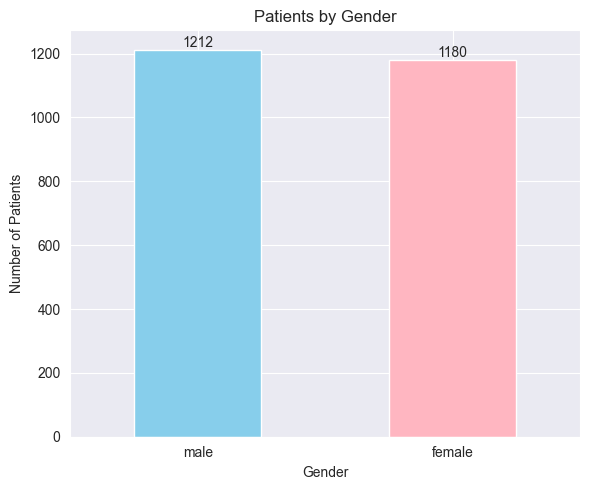

In [7]:
patient_grouped_by_gender = data[['PatientID', 'Gender']].copy()

gender_group_counts = patient_grouped_by_gender['Gender'].value_counts().sort_index()

gender_group_counts.index = gender_group_counts.index.map({0: 'male', 1: 'female'})

plt.figure(figsize=(6, 5))
ax = gender_group_counts.plot(kind='bar', color=['skyblue', 'lightpink'])

plt.title('Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.tight_layout()

ax.bar_label(ax.containers[0])

plt.show()

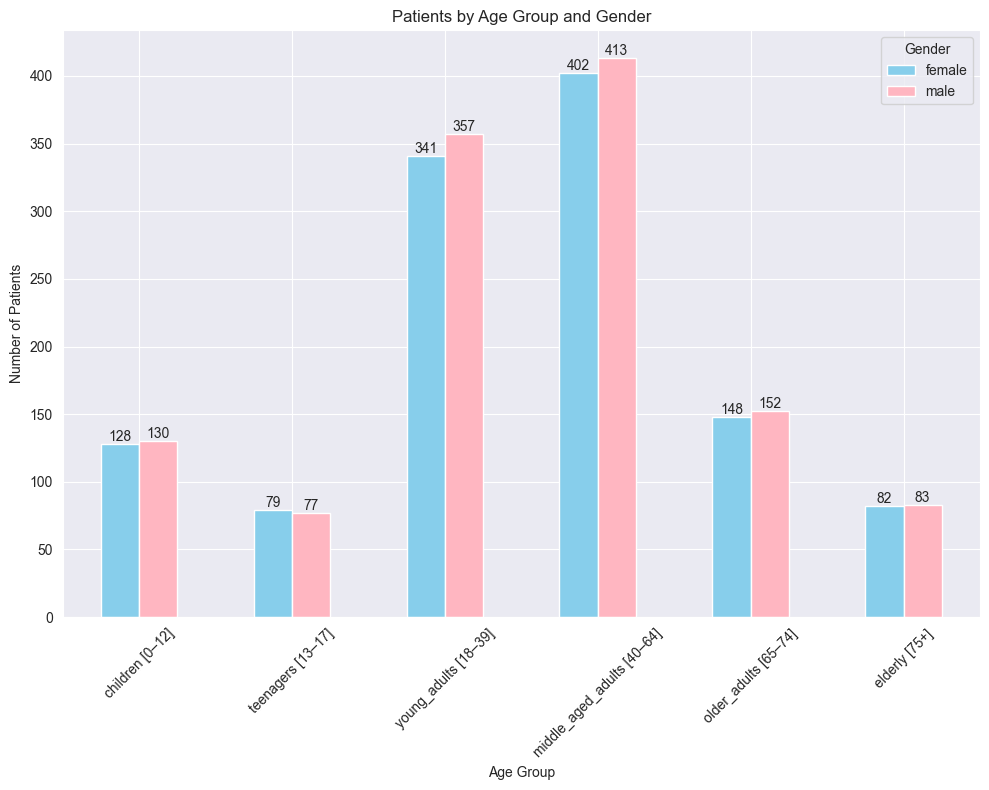

In [8]:
patient_grouped = data[['PatientID', 'Age', 'Gender']].copy()
patient_grouped['Gender'] = patient_grouped['Gender'].map({0: 'male', 1: 'female'})

bins = [0, 12, 17, 39, 64, 74, float('inf')]
labels = ['children [0–12]', 'teenagers [13–17]', 'young_adults [18–39]',
          'middle_aged_adults [40–64]', 'older_adults [65–74]', 'elderly [75+]']

patient_grouped['age_group'] = pd.cut(patient_grouped['Age'], bins=bins, labels=labels)

grouped = patient_grouped.groupby(['age_group', 'Gender'], observed=True).size().unstack(fill_value=0)

ax = grouped.plot(kind='bar', figsize=(10, 8), color=['skyblue', 'lightpink'])

plt.title('Patients by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

##### In the above visualizations, we can see the distribution of patients in the dataset by gender and age group

### Problem 3. Data cleaning and preprocessing (1 point)
This should be self-explanatory. In an appropriate notebook (probably different than your previous one), explore different ways to clean and preprocess the dataset.

This is still part of your research. That is, don't be afraid to _try out different approaches to the same problem_. E.g., if you have a lot of missing values, you may not know right away how to handle them. Experimenting with several approaches will give you a better indication what works well for your data and goals.

In [9]:
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [10]:
data.shape

(2392, 29)

In [11]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [12]:
data.index

RangeIndex(start=0, stop=2392, step=1)

In [13]:
data.dtypes	

PatientID                   int64
Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
DoctorInCharge             object
dtype: object

In [14]:
data.head(3)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid


In [15]:
#Checking data types and non-null counts for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [16]:
#Checking for null values
data.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [17]:
# There aren't duplicated rows
data.duplicated().sum()

np.int64(0)

In [18]:
data['Gender'].value_counts()

Gender
0    1212
1    1180
Name: count, dtype: int64

### Problem 4. Exploratory data analysis (1 point)
This step may, or may not, happen in unison with the previous one. Your goal is to understand the data distributions, relationships, useful features, maybe create visualizations and inform your data cleaning process.

In [19]:
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [20]:
data.Ethnicity.value_counts()

Ethnicity
0    1465
1     475
2     229
3     223
Name: count, dtype: int64

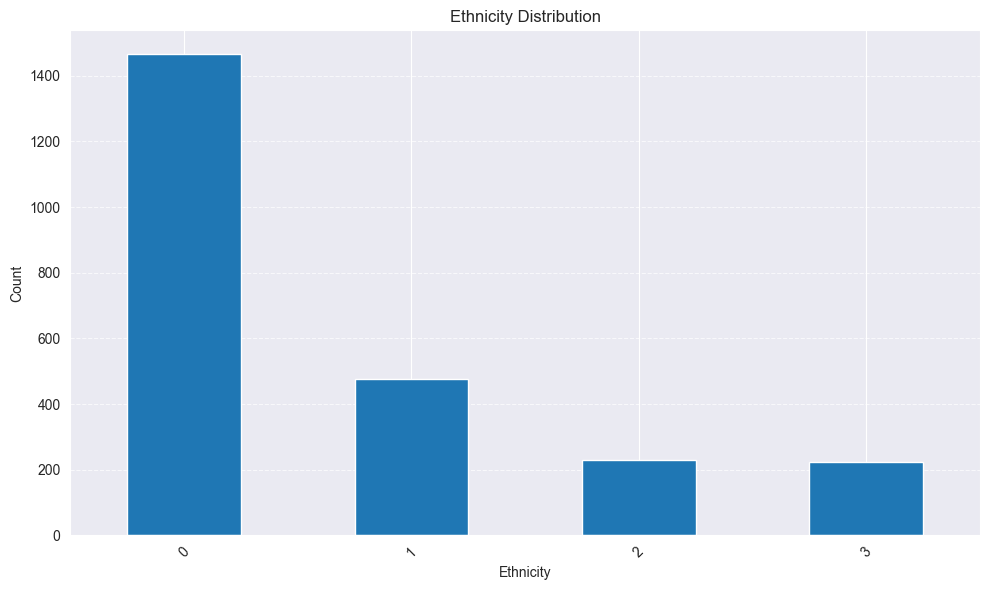

In [21]:
data_ethnicity = data['Ethnicity'].copy()
ethnicity_count = data_ethnicity.value_counts()

ethnicity_count.plot(kind='bar', figsize=(10, 6))
plt.title("Ethnicity Distribution")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
education_level_count = data.EducationLevel.value_counts()

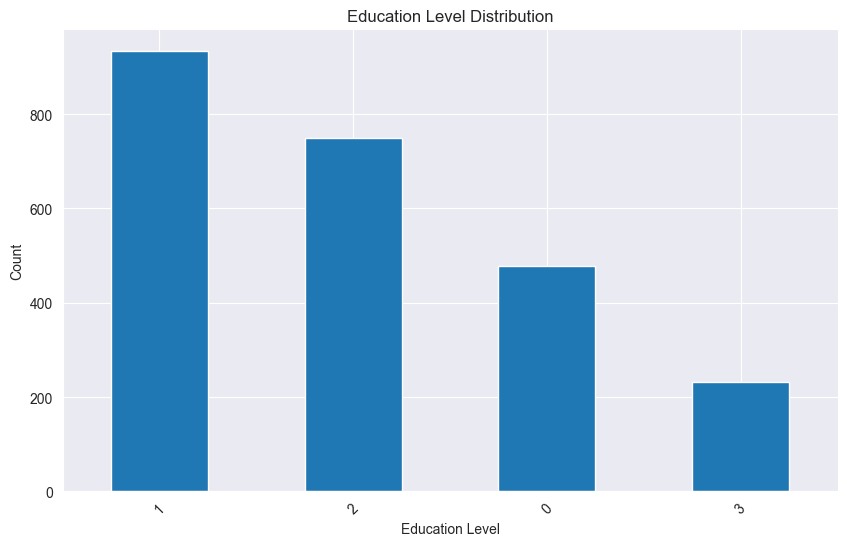

In [23]:
education_level_count.plot(kind='bar', figsize=(10, 6))
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Obesity Analysis Based on BMI

In this section, we will analyze obesity among patients using the Body Mass Index (BMI). BMI is a widely used indicator that helps categorize individuals based on their weight in relation to height.

### BMI Categories

We will use the standard BMI classification to group patients:

- **Underweight**: BMI < 18.5  
- **Normal weight**: 18.5 ≤ BMI < 25  
- **Overweight**: 25 ≤ BMI < 30  
- **Obese I**: 30 ≤ BMI < 35  
- **Obese II**: 35 ≤ BMI < 40  
- **Obese III**: BMI ≥ 40

In [24]:
data_bmi = data[['PatientID', 'Age', 'Gender', 'BMI']].copy()
print(f"Mean value of BMI for the whole dataset: {data_bmi.BMI.mean()}")

Mean value of BMI for the whole dataset: 27.244876896734347


In [25]:
data_bmi_by_gender = data_bmi[['Gender', 'BMI']].copy()
data_bmi_by_gender

,Gender,BMI
0,0,15.848744
1,1,22.757042
2,0,18.395396
3,1,38.515278
4,0,19.283802
...,...,...
2387,1,29.059613
2388,1,20.740850
2389,0,37.079560
2390,1,23.444712


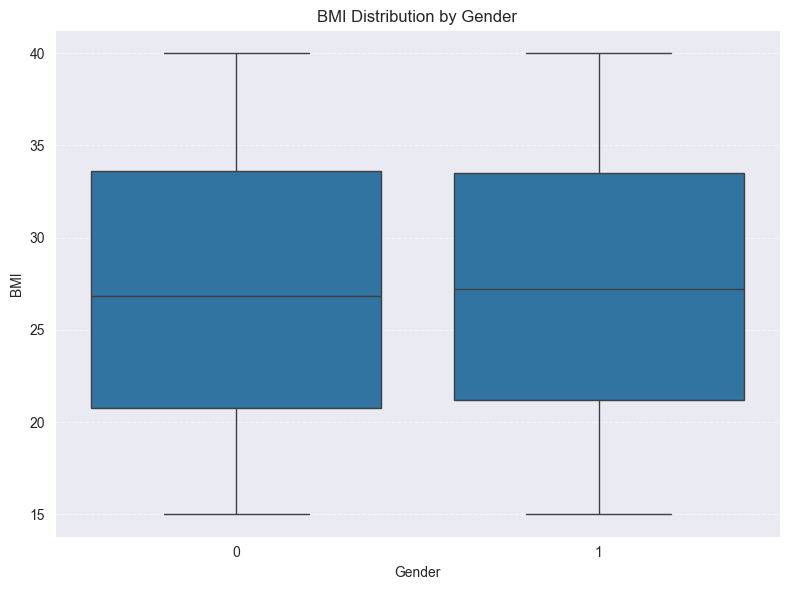

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='BMI', data=data_bmi_by_gender)
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### The boxplot shows that the BMI distribution is quite similar between males and females. The median, interquartile range (IQR), and overall spread appear to be nearly the same for both genders.

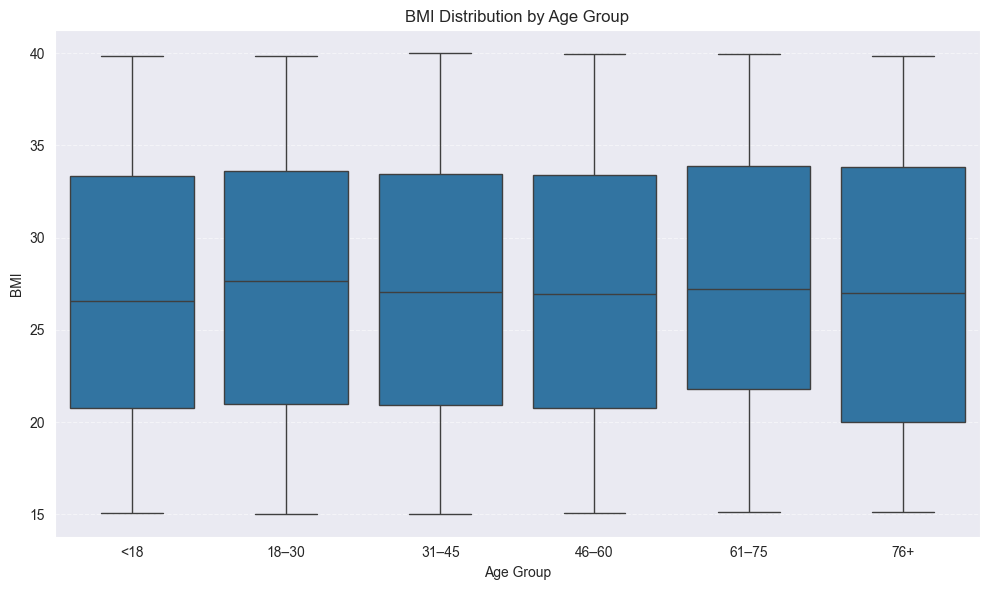

In [27]:
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['<18', '18–30', '31–45', '46–60', '61–75', '76+']
data_bmi['AgeGroup'] = pd.cut(data_bmi['Age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='BMI', data=data_bmi)
plt.title('BMI Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The boxplot shows that the BMI distribution is quite similar between different age groups. The median, interquartile range (IQR), and overall spread appear to be nearly the same for all age groups.

In [28]:
data.Diagnosis.value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [29]:
data_regression = data.iloc[:, 1:-1].copy()
data_regression

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,...,0,3.125249,5.166032,0,1,0,0,0,1,1
2388,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,...,0,1.132977,5.509502,0,0,0,1,1,0,1
2389,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,2.794847,...,0,1.685962,3.346877,1,0,1,1,0,1,1
2390,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,9.448862,...,1,3.481549,1.713274,0,1,1,0,1,1,0


#### Train a Random Forest model and check the accuracy. If the accuracy is high enough, it means the features describe the diagnosis well.

In [30]:
X = data_regression.drop('Diagnosis', axis=1)
y = data_regression['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       456
           1       0.00      0.00      0.00        23

    accuracy                           0.95       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.91      0.95      0.93       479



### We display the top features that have the highest importance for the diagnosis

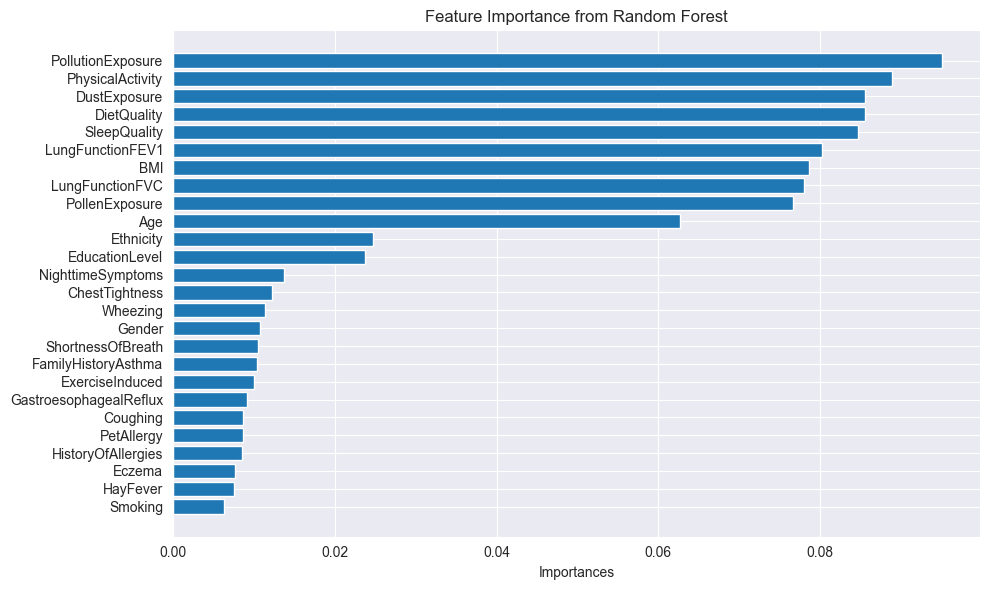

In [31]:
importances = model.feature_importances_
feature_names = X.columns

feat_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.xlabel('Importances')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Problem 5. Feature manipulation (1 point)
Now that your data has been thoroughly cleaned (w.r.t. your goal to model diagnoses) and explored, you'll need to "play around" and prepare good features.

You don't have to think about modelling (machine learning) at this stage (although it won't do harm). Perform feature selection and feature engineering in ways that you think will be beneficial for a "mental" model of the data. Such a model consists of hypotheses that you should be able to test.

Feel free to do any sort of feature maniplulation on the data you like. Ideally, at the end of the process, you'll have a rectangular data table consisting of only (floating-point) numbers and nothing else.

In [32]:
feat_importance

,Feature,Importance
9,PollutionExposure,0.095017
6,PhysicalActivity,0.088857
11,DustExposure,0.085602
7,DietQuality,0.085558
8,SleepQuality,0.084683
18,LungFunctionFEV1,0.080280
4,BMI,0.078682
19,LungFunctionFVC,0.077993
10,PollenExposure,0.076613
0,Age,0.062704


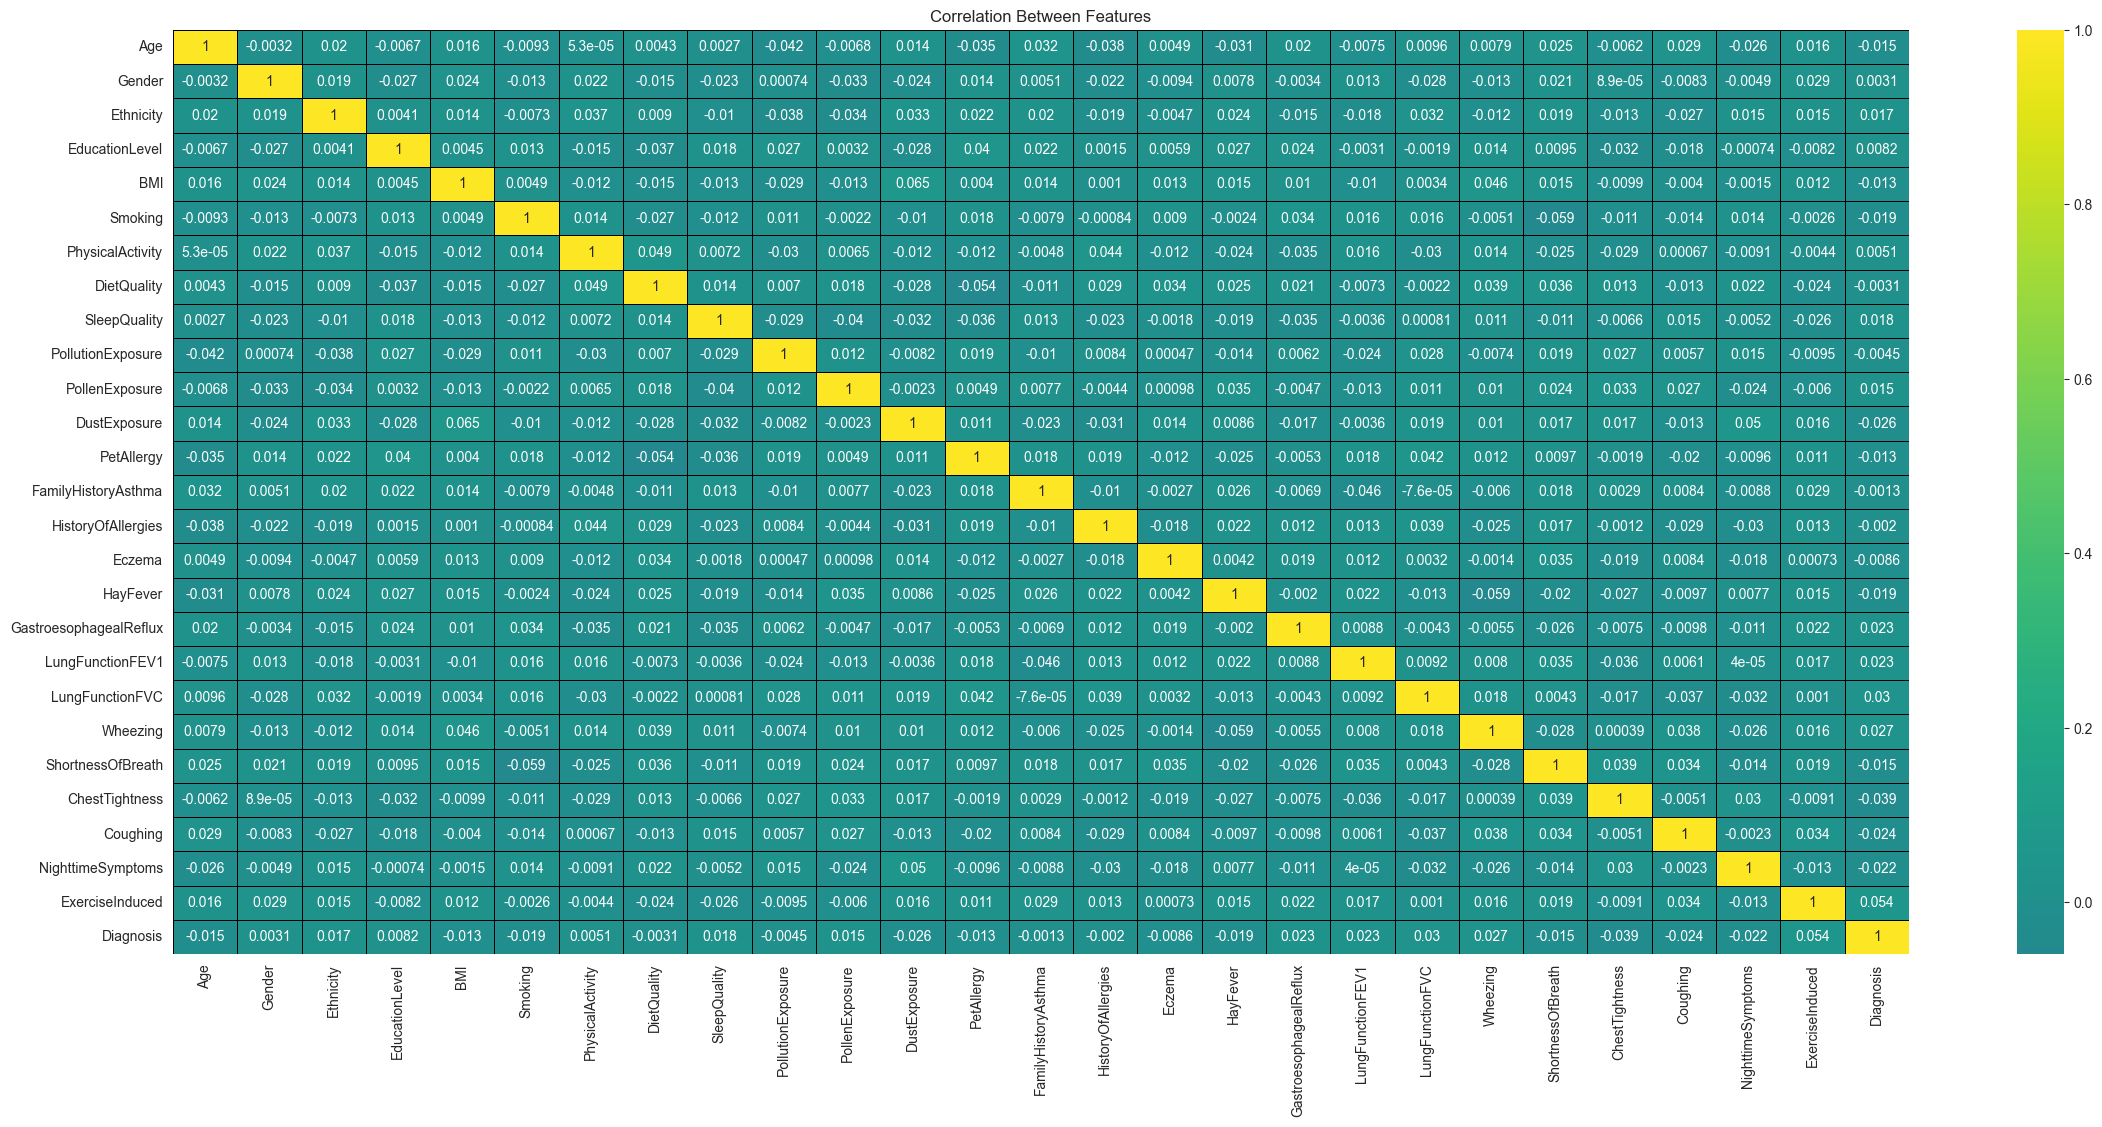

In [33]:
correlation_matrix = data_regression.corr(numeric_only=True)
plt.figure(figsize=(28, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, 
            linewidths=0.5, linecolor='black')
plt.title('Correlation Between Features')
plt.show()

### We are looking for highly correlated features. If we find any, we can remove one of them to avoid redundancy

In [34]:
high_corr = correlation_matrix.abs() > 0.5
high_corr_pairs = high_corr.where(~np.eye(high_corr.shape[0], dtype=bool)).stack()
high_corr_pairs[high_corr_pairs == True]

Series([], dtype: object)

### There aren't any highly correlated features. This means that for our Random Forest model, we should keep all features to achieve better accuracy

### Problem 6. Data preparation and manipulation script (2 points)
So far, you should have tried lots of different ways to work with the data. Some of them should have been good, others - not so much. This is extremely valuable research, and we don't want to lose it, but now we have to think about automation.

Extract your data preprocessing and manipulation functions into one or more files in the `src/` (or similar) directory. Debug the code and ensure it's been optimized. Use vectorization and the `pandas` / `numpy` APIs as much as possible. I don't usually expect data processing scripts to create visualizations. Most often, they consist of functions which accept some dataframe(s) and return (an)other dataframe(s). Also, we usually avoid one-liners (e.g., a function which only calls a different function) unless there's a very good reason for them (e.g., it's semantically easier to understand).

Refactor the code so that it's **reusable**. Function parameters (and polymorphism) achieve a lot in terms of reusability :). Avoid hardcoding stuff. Follow the best practices in Python and the style guides. Use a linter to help you clean up your code.

#### Columns mapping => idx: column name

In [35]:
column_mapping(data)

{0: 'PatientID',
 1: 'Age',
 2: 'Gender',
 3: 'Ethnicity',
 4: 'EducationLevel',
 5: 'BMI',
 6: 'Smoking',
 7: 'PhysicalActivity',
 8: 'DietQuality',
 9: 'SleepQuality',
 10: 'PollutionExposure',
 11: 'PollenExposure',
 12: 'DustExposure',
 13: 'PetAllergy',
 14: 'FamilyHistoryAsthma',
 15: 'HistoryOfAllergies',
 16: 'Eczema',
 17: 'HayFever',
 18: 'GastroesophagealReflux',
 19: 'LungFunctionFEV1',
 20: 'LungFunctionFVC',
 21: 'Wheezing',
 22: 'ShortnessOfBreath',
 23: 'ChestTightness',
 24: 'Coughing',
 25: 'NighttimeSymptoms',
 26: 'ExerciseInduced',
 27: 'Diagnosis',
 28: 'DoctorInCharge'}

#### Use mapping to see the column index and then use 'get_column(data, column1: int, column5: int, column24: int)
#### The function return dataframe with the selected columns

In [40]:
result = get_columns(data, 1, 5, 3, 1, 1, 1)
result

,Age,BMI,Ethnicity,Age,Age,Age
0,63,15.848744,1,63,63,63
1,26,22.757042,2,26,26,26
2,57,18.395396,2,57,57,57
3,40,38.515278,2,40,40,40
4,61,19.283802,0,61,61,61
...,...,...,...,...,...,...
2387,43,29.059613,0,43,43,43
2388,18,20.740850,0,18,18,18
2389,54,37.079560,3,54,54,54
2390,46,23.444712,0,46,46,46


### Problem 7. Documentation (1 point)
Ensure all your public-facing functions (that is, functions that are "exposed" to the user) have docstrings. Ensure they are well-documented and their purpose is clear. This is especially valuable if you're doing some advanced analysis or data manipulation. You can see various ways of creating docstrings online. There are even tools (e.g., VSCode extensions) which will help you with the docstring boilerplate.

#### Find all documented functions folder `functions` => `data_main_structur.py`

### Problem 8. Testing (1 point)
Now that you've done the previous two problems, you have _specification_ (your documentation - it tells you what you intend to do) and _implementation_ (your well-written and refactored code - it tells you _how_ it's done). The difficult part now is to ensure these two things match.

Create unit tests for your functions. Be careful so you test _your_ code, not `pandas`'. Create hypothesis tests to validate your assumptions. Do validity checks on the input data and sanity checks on the outputs of functions. Ensure your code is well-tested. Ensure it's modular, reusable, and flexible; but most of all - that it works **correctly**. If you haven't yet (though you should have - in problem 6) - think about exceptions and exception handling.

In [36]:
# from notebooks.tests_src import tests
# from notebooks.tests_src import hypothesis_tests

### Problem 9. Reproducibility (1 point)
Ensure all your notebooks and scripts are not only correct, but also reproducible. List all code dependencies (probably in a `requirements.txt` file); ensure your random seeds are correct; ensure the code produces the same results when run multiple times, etc.

Do your final cleanup work. You might want to differentiate your "draft" noteoboks from your "official" ones (although I advise against that) and creat your final commits.

In [36]:
# pip freeze > requirements.txt
# pip install -r requirements.txt

### * Problem 10. Above and beyond
Of course, there are many things to be done. If you have time, I advise you learn how to work with data versioning (using DVC) and data pipeline / artifact tracking (using MLFlow or a similar tool). You might also find it useful to create a "proper", advanced data pipeline where you may need to work with big files (using Dask or a similar library), or schedule and organize tasks (using data pipeline managers like Luigi or Airflow).

You might also want to do machine learning. I've deliberately stayed away from that for the purposes of the lab because it's a whole different beast, but it's a worthy challenge and it's extremely interesting.